# Clustering Model Solution

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
# Loading Data
steam_data = pd.read_csv('Datasets/cleaned_steam_data.csv')
reviews = pd.read_csv('Datasets/reviews_processed.csv')
genres = pd.read_csv('Datasets/genres.csv')

### Looking if the data is good

In [3]:
steam_data.head(2)

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,multiplayer,local,coop,singleplayer
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,0,0,0,0,0,0,True,True,False,False


In [4]:
reviews.head(2)

,app_name,count,mean,positive_rate,weighted_score
0,神明的一天世界-God's One Day World,14,0.571429,0.785714,0.659272
1,! That Bastard Is Trying To Steal Our Gold !,26,-0.384615,0.307692,0.378996


In [5]:
reviews.describe()

,count,mean,positive_rate,weighted_score
count,9363.000000,9363.000000,9300.000000,9300.000000
mean,665.798569,0.454357,0.732104,0.663343
std,3187.723508,0.428824,0.206585,0.147244
min,1.000000,-1.000000,0.029412,0.108476
25%,18.000000,0.200000,0.608905,0.571727
50%,58.000000,0.555556,0.778470,0.683278
75%,244.000000,0.788235,0.894737,0.772497
max,88973.000000,1.000000,1.000000,0.967521


In [6]:
print("steam data: ",len(steam_data))
print("reviews: ",len(reviews))

steam data:  26564
reviews:  9363


## Merging Reviews with Steam Data

In [7]:
data = steam_data.merge(reviews, left_on="name", right_on="app_name", how="left")
data.describe()

,appid,average_playtime,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,Early Access,Education,...,Software Training,Sports,Strategy,Utilities,Video Production,Violent,count,mean,positive_rate,weighted_score
count,2.656400e+04,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,...,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,26564.000000,7420.000000,7420.000000,7365.000000,7365.000000
mean,5.921365e+05,149.890717,71.390776,0.444813,0.368845,0.002936,0.377503,0.003237,0.108643,0.001882,...,0.001129,0.049578,0.192102,0.005421,0.001393,0.031321,636.391105,0.460500,0.735704,0.665434
std,2.502956e+05,1824.209705,23.336491,0.496954,0.482501,0.054109,0.484772,0.056808,0.311197,0.043345,...,0.033587,0.217076,0.393960,0.073428,0.037296,0.174186,3323.773370,0.430534,0.206576,0.146663
min,1.000000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.035714,0.171425
25%,3.978925e+05,0.000000,58.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.219806,0.615385,0.572602
50%,5.933350e+05,0.000000,75.952526,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,0.567093,0.785714,0.687998
75%,7.937175e+05,0.000000,89.285714,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,221.000000,0.793129,0.897810,0.774082
max,1.069460e+06,190625.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,88973.000000,1.000000,1.000000,0.967521


In [8]:
data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Violent,multiplayer,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,0,True,True,False,False,Counter-Strike,12353.0,0.937181,0.968591,0.941109
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,0,True,True,False,False,Team Fortress Classic,1542.0,0.678340,0.839170,0.801963
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,0,True,False,False,False,Day of Defeat,1030.0,0.819417,0.909709,0.858964
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,0,True,True,False,False,Deathmatch Classic,457.0,0.702407,0.851204,0.795670
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,0,True,False,False,True,Half-Life: Opposing Force,1743.0,0.925416,0.962708,0.913786


In [9]:
data.isnull().sum()

appid                        0
name                         0
average_playtime             0
owners                       0
rating                       0
Action                       0
Adventure                    0
Animation & Modeling         0
Casual                       0
Design & Illustration        0
Early Access                 0
Education                    0
Free to Play                 0
Gore                         0
Indie                        0
Massively Multiplayer        0
Nudity                       0
RPG                          0
Racing                       0
Sexual Content               0
Simulation                   0
Software Training            0
Sports                       0
Strategy                     0
Utilities                    0
Video Production             0
Violent                      0
multiplayer                  0
local                        0
coop                         0
singleplayer                 0
app_name                 19144
count   

In [10]:
data = data.fillna(0)
data.isnull().sum()

appid                    0
name                     0
average_playtime         0
owners                   0
rating                   0
Action                   0
Adventure                0
Animation & Modeling     0
Casual                   0
Design & Illustration    0
Early Access             0
Education                0
Free to Play             0
Gore                     0
Indie                    0
Massively Multiplayer    0
Nudity                   0
RPG                      0
Racing                   0
Sexual Content           0
Simulation               0
Software Training        0
Sports                   0
Strategy                 0
Utilities                0
Video Production         0
Violent                  0
multiplayer              0
local                    0
coop                     0
singleplayer             0
app_name                 0
count                    0
mean                     0
positive_rate            0
weighted_score           0
dtype: int64

In [11]:
data.tail()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,Violent,multiplayer,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score
26559,1065230,Room of Pandora,0,0-20000,100.000000,0,1,0,1,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0
26560,1065570,Cyber Gun,0,0-20000,88.888889,1,1,0,0,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0
26561,1065650,Super Star Blast,0,0-20000,0.000000,1,0,0,1,0,...,0,True,False,True,True,0,0.0,0.0,0.0,0.0
26562,1066700,New Yankee 7: Deer Hunters,0,0-20000,100.000000,0,1,0,1,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0
26563,1069460,Rune Lord,0,0-20000,100.000000,0,1,0,1,0,...,0,False,False,False,True,0,0.0,0.0,0.0,0.0


## Training Models

In [12]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score 
from kneed import KneeLocator
from scipy.cluster.hierarchy import dendrogram

In [13]:
features = genres["genres"].tolist()
features.append('average_playtime')
features.append('rating')
features.append('local')
features.append('coop')
features.append('multiplayer')
features.append('singleplayer')
# features.append('weighted_score')
# features

### Choosing the number of clusters

#### Testing without review scores

In [14]:
kmeans_args = {
    "random_state": 42
}

sum_sqr_dist = []
silhouette_coeff = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(steam_data[features])
    sum_sqr_dist.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(steam_data[features], kmeans.labels_)
        silhouette_coeff.append(score)

#### Testing with review scores

In [15]:
features.append('weighted_score')

sum_sqr_dist_weighted = []
silhouette_coeff_weighted = []
for k in range (1, 15):
    kmeans = KMeans(n_clusters=k, **kmeans_args)
    kmeans.fit(data[features], sample_weight=data["weighted_score"])
    sum_sqr_dist_weighted.append(kmeans.inertia_)
    if k > 1:
        score = silhouette_score(data[features], kmeans.labels_)
        silhouette_coeff_weighted.append(score)

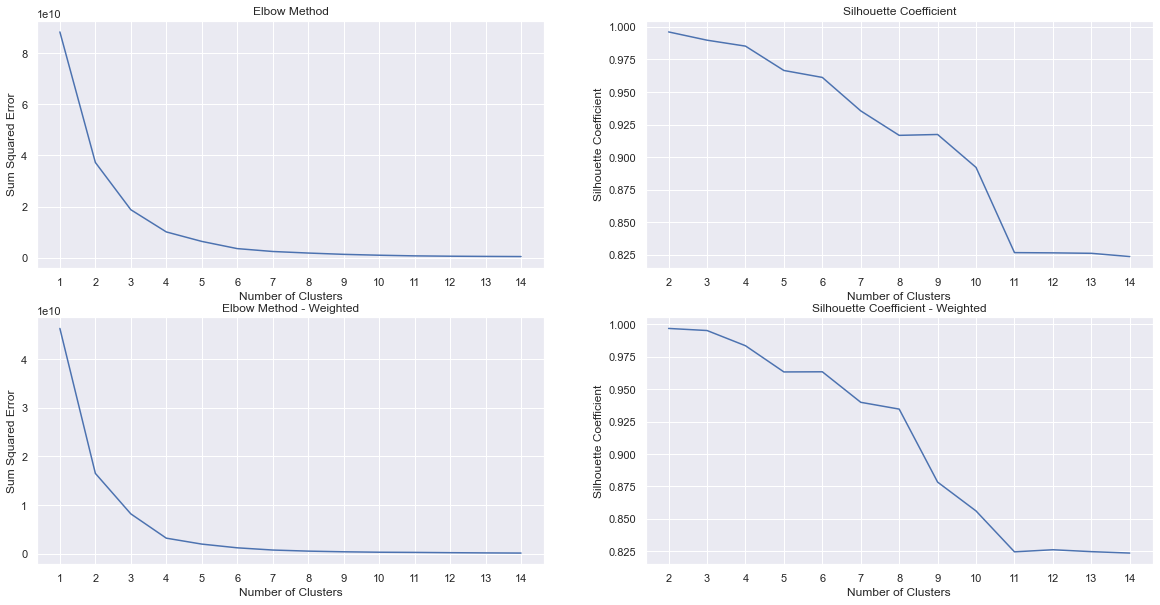

In [16]:
sns.set_style('darkgrid')

fig, axes = plt.subplots(2, 2, figsize=(20, 10))
sns.lineplot(x=range(1, 15), y=sum_sqr_dist, ax=axes[0, 0])
axes[0, 0].set_xticks(range(1, 15))
axes[0, 0].title.set_text("Elbow Method")
axes[0, 0].set_xlabel("Number of Clusters")
axes[0, 0].set_ylabel("Sum Squared Error")
sns.lineplot(x=range(2, 15), y=silhouette_coeff, ax=axes[0, 1])
axes[0, 1].set_xticks(range(2, 15))
axes[0, 1].title.set_text("Silhouette Coefficient")
axes[0, 1].set_xlabel("Number of Clusters")
axes[0, 1].set_ylabel("Silhouette Coefficient")

sns.lineplot(x=range(1, 15), y=sum_sqr_dist_weighted, ax=axes[1, 0])
axes[1, 0].set_xticks(range(1, 15))
axes[1, 0].title.set_text("Elbow Method - Weighted")
axes[1, 0].set_xlabel("Number of Clusters")
axes[1, 0].set_ylabel("Sum Squared Error")
sns.lineplot(x=range(2, 15), y=silhouette_coeff_weighted, ax=axes[1, 1])
axes[1, 1].set_xticks(range(2, 15))
axes[1, 1].title.set_text("Silhouette Coefficient - Weighted")
axes[1, 1].set_xlabel("Number of Clusters")
axes[1, 1].set_ylabel("Silhouette Coefficient")

plt.show()


In [17]:
kneelocator = KneeLocator(
    range(1, 15), sum_sqr_dist, curve="convex", direction="decreasing"
)
kneelocator_weighted = KneeLocator(
    range(1, 15), sum_sqr_dist_weighted, curve="convex", direction="decreasing"
)
print("without weights: ", kneelocator.elbow)
print("with weights: ", kneelocator_weighted.elbow)

without weights:  4
with weights:  4


After observing the results of each cluster using the elbow method and the silhouette coefficient, we can see that around 3-4 clusters is the best number of clusters. I decided to choose 4 clusters

In [18]:
kmeans = KMeans(n_clusters=4)
model = kmeans.fit_predict(data[features], sample_weight=data["weighted_score"])

In [19]:
data["kmeans_cluster"] = model
data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,multiplayer,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,True,True,False,False,Counter-Strike,12353.0,0.937181,0.968591,0.941109,3
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,True,True,False,False,Team Fortress Classic,1542.0,0.678340,0.839170,0.801963,0
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,True,False,False,False,Day of Defeat,1030.0,0.819417,0.909709,0.858964,0
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,True,True,False,False,Deathmatch Classic,457.0,0.702407,0.851204,0.795670,0
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,True,False,False,True,Half-Life: Opposing Force,1743.0,0.925416,0.962708,0.913786,0


In [20]:
kmeans_unweighted = KMeans(n_clusters=4)
model2 = kmeans.fit_predict(data[features])

In [21]:
data["kmeans_cluster_unweighted"] = model2
data.head()

,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted
0,10,Counter-Strike,17612,10000000-20000000,97.388815,1,0,0,0,0,...,True,False,False,Counter-Strike,12353.0,0.937181,0.968591,0.941109,3,3
1,20,Team Fortress Classic,277,5000000-10000000,83.978740,1,0,0,0,0,...,True,False,False,Team Fortress Classic,1542.0,0.678340,0.839170,0.801963,0,0
2,30,Day of Defeat,187,5000000-10000000,89.564761,1,0,0,0,0,...,False,False,False,Day of Defeat,1030.0,0.819417,0.909709,0.858964,0,0
3,40,Deathmatch Classic,258,5000000-10000000,82.662338,1,0,0,0,0,...,True,False,False,Deathmatch Classic,457.0,0.702407,0.851204,0.795670,0,0
4,50,Half-Life: Opposing Force,624,5000000-10000000,94.799567,1,0,0,0,0,...,False,False,True,Half-Life: Opposing Force,1743.0,0.925416,0.962708,0.913786,0,0


In [22]:
def get_recommendations(name, type):
    # Getting Cluster
    if type == 1:
        cluster_num = data[data["name"] == name]['kmeans_cluster']
        cluster = data[data["kmeans_cluster"] == int(cluster_num)]
    elif type == 2:
        cluster_num = data[data["name"] == name]['genres_cluster']
        cluster = data[data["genres_cluster"] == int(cluster_num)]
    elif type == 3:
        cluster_num = data[data["name"] == name]['genres_cluster_unweighted']
        cluster = data[data["genres_cluster_unweighted"] == int(cluster_num)]
    elif type == 4:
        cluster_num = data[data["name"] == name]['kmeans_cluster_unweighted']
        cluster = data[data["kmeans_cluster_unweighted"] == int(cluster_num)]   
    else:
        cluster_num = data[data["name"] == name]['hac']
        cluster = data[data["hac"] == int(cluster_num)]
    # Getting neighbors
    game = cluster[cluster["name"] == name]
    model = NearestNeighbors(n_neighbors=11).fit(cluster[features])
    neighbors = model.kneighbors(X=game[features], return_distance=True)
    
    # Getting games
    indices = neighbors[1][0].tolist()
    print("Distance of neighbors:", neighbors[0][0].tolist())
    return cluster.iloc[indices[:]]


In [23]:
get_recommendations("Brawlhalla", 1)

Distance of neighbors: [0.0, 3.301556223190527, 5.83292312405318, 6.827729910826505, 7.218444194795448, 8.369179034534437, 8.483839672376696, 8.680114253102154, 8.812239294595365, 8.837224361698073, 9.744081351064949]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted
2950,291550,Brawlhalla,724,10000000-20000000,83.489636,1,0,0,0,0,...,True,True,True,Brawlhalla,19408.0,0.755359,0.877679,0.858346,0,0
896,48720,Mount & Blade: With Fire & Sword,723,1000000-2000000,85.530106,1,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
12163,562230,Space Tyrant,722,20000-50000,88.315217,0,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
14754,645630,Car Mechanic Simulator 2018,724,500000-1000000,77.334871,0,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
4158,332310,LEGO® Worlds,723,500000-1000000,76.699855,0,1,0,0,0,...,False,True,True,LEGO® Worlds,5320.0,0.625188,0.812594,0.788970,0,0
1779,239250,Castlevania: Lords of Shadow 2,732,200000-500000,83.304287,1,1,0,0,0,...,False,False,True,Castlevania: Lords of Shadow 2,892.0,0.607623,0.803812,0.764519,0,0
2409,269250,WORLD END ECONOMiCA episode.01,732,100000-200000,85.212569,0,0,0,0,0,...,False,False,True,WORLD END ECONOMiCA episode.01,339.0,0.663717,0.831858,0.774460,0,0
442,20510,S.T.A.L.K.E.R.: Clear Sky,716,500000-1000000,86.006509,1,0,0,0,0,...,False,False,True,S.T.A.L.K.E.R.: Clear Sky,1119.0,0.590706,0.795353,0.759672,0,0
72,2800,X2: The Threat,732,200000-500000,80.916031,0,0,0,0,0,...,False,False,True,X2: The Threat,117.0,0.470085,0.735043,0.679138,0,0
8740,460920,Steep™,724,500000-1000000,74.983181,1,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0


In [24]:
get_recommendations("Gang Beasts", 1)

Distance of neighbors: [0.0, 2.9308706601009162, 4.254420910728253, 5.333344662068555, 8.72127285164392, 9.424849465227073, 12.10611537210379, 13.96713664499637, 14.347202616711892, 14.385069791683442, 16.188748009944923]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,local,coop,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted
2788,285900,Gang Beasts,681,1000000-2000000,69.563642,1,1,0,1,0,...,True,False,False,Gang Beasts,6015.0,0.506899,0.753450,0.734991,0,0
329,13200,Unreal 2: The Awakening,682,200000-500000,70.588235,1,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
2302,264540,Platformines,679,100000-200000,66.549296,1,0,0,0,0,...,False,False,True,Platformines,171.0,0.298246,0.649123,0.617458,0,0
14018,616560,Ultimate Epic Battle Simulator,677,200000-500000,67.587698,1,1,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
4073,329430,State of Decay: YOSE,676,200000-500000,76.084408,1,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
18428,750920,Shadow of the Tomb Raider,672,500000-1000000,71.076115,1,1,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
3227,300760,Epsilon,679,0-20000,57.943925,1,0,0,0,0,...,False,False,True,0,0.0,0.000000,0.000000,0.000000,0,0
14665,641990,The Escapists 2,674,500000-1000000,81.333973,0,0,0,0,0,...,True,True,True,0,0.0,0.000000,0.000000,0.000000,0,0
1478,219640,Chivalry: Medieval Warfare,675,5000000-10000000,82.480220,1,0,0,0,0,...,False,False,False,Chivalry: Medieval Warfare,21288.0,0.631436,0.815718,0.800000,0,0
1519,222480,Resident Evil Revelations / Biohazard Revelations,683,500000-1000000,83.577564,1,1,0,0,0,...,False,True,True,0,0.0,0.000000,0.000000,0.000000,0,0


After inspecting the results using 4 clusters, it looks like the recommendations are not very accurate. So we are going to try and create more clusters (1 for each genre)

In [25]:
kmeans_genres = KMeans(n_clusters=22)
model_genres = kmeans_genres.fit_predict(data[genres["genres"].tolist()], sample_weight=data["weighted_score"])
data['genres_cluster'] = model_genres

In [26]:
kmeans_genres_unweighted = KMeans(n_clusters=22)
model_genres = kmeans_genres_unweighted.fit_predict(data[genres["genres"].tolist()])
data['genres_cluster_unweighted'] = model_genres

In [27]:
get_recommendations("Gang Beasts", 2)

Distance of neighbors: [0.0, 95.5936435055175, 97.07460450574673, 116.17454095702612, 125.13016482137087, 165.704480639789, 166.07355131995138, 185.009242410254, 201.00889075393258, 228.84664590657792, 246.81934686527003]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted,genres_cluster,genres_cluster_unweighted
2788,285900,Gang Beasts,681,1000000-2000000,69.563642,1,1,0,1,0,...,False,Gang Beasts,6015.0,0.506899,0.753450,0.734991,0,0,17,7
13706,605910,Bootombaa,771,200000-500000,37.398374,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
1763,238460,BattleBlock Theater®,774,2000000-5000000,97.347426,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
22808,882710,東方幕華祭 TouHou Makuka Sai ~ Fantastic Danmaku Fe...,568,0-20000,96.470588,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
7877,436000,Lovely Planet Arcade,556,0-20000,75.000000,1,1,0,1,0,...,True,Lovely Planet Arcade,51.0,0.490196,0.745098,0.670492,0,0,17,7
9633,493540,Figment,516,20000-50000,84.710744,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
5484,366180,Disposable Heroes,515,20000-50000,64.935065,1,1,0,1,0,...,True,Disposable Heroes,33.0,0.636364,0.818182,0.708116,0,0,17,7
2524,274190,Broforce,498,1000000-2000000,96.700112,1,1,0,1,0,...,True,Broforce,366.0,0.994536,0.997268,0.913216,0,0,17,7
11536,545410,A Trip to Yugoslavia: Director's Cut,480,50000-100000,69.747899,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
6779,402220,Lift It,453,50000-100000,50.000000,1,1,0,1,0,...,True,Lift It,39.0,0.025641,0.512821,0.508597,0,0,17,13


In [28]:
get_recommendations("Gang Beasts", 3)

Distance of neighbors: [0.0, 64.10988693572641, 67.05958934694014, 95.5936435055175, 97.07460450574673, 99.11429325250764, 113.46863406852195, 116.17454095702612, 125.13016482137087, 152.5655242134806, 157.06992422548402]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted,genres_cluster,genres_cluster_unweighted
2788,285900,Gang Beasts,681,1000000-2000000,69.563642,1,1,0,1,0,...,False,Gang Beasts,6015.0,0.506899,0.753450,0.734991,0,0,17,7
6251,386940,Ultimate Chicken Horse,622,500000-1000000,94.604618,1,0,0,1,0,...,False,Ultimate Chicken Horse,1231.0,0.905768,0.952884,0.899720,0,0,7,7
11978,556280,Neon Prism,748,50000-100000,71.559633,1,0,0,1,0,...,True,Neon Prism,11.0,0.636364,0.818182,0.667587,0,0,7,7
13706,605910,Bootombaa,771,200000-500000,37.398374,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
1763,238460,BattleBlock Theater®,774,2000000-5000000,97.347426,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
15830,674940,Stick Fight: The Game,584,2000000-5000000,89.888575,1,0,0,1,0,...,False,0,0.0,0.000000,0.000000,0.000000,0,0,7,7
12949,583760,Slash It 2,792,100000-200000,93.006993,1,0,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,7,7
22808,882710,東方幕華祭 TouHou Makuka Sai ~ Fantastic Danmaku Fe...,568,0-20000,96.470588,1,1,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,17,7
7877,436000,Lovely Planet Arcade,556,0-20000,75.000000,1,1,0,1,0,...,True,Lovely Planet Arcade,51.0,0.490196,0.745098,0.670492,0,0,17,7
13080,587390,LOR - League of Runners,532,20000-50000,36.842105,1,0,0,1,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,7,7


In [29]:
get_recommendations("Gang Beasts", 4)

Distance of neighbors: [0.0, 2.9308706601009162, 4.254420910728253, 5.333344662068555, 8.72127285164392, 9.424849465227073, 12.10611537210379, 13.96713664499637, 14.347202616711892, 14.385069791683442, 16.188748009944923]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,singleplayer,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted,genres_cluster,genres_cluster_unweighted
2788,285900,Gang Beasts,681,1000000-2000000,69.563642,1,1,0,1,0,...,False,Gang Beasts,6015.0,0.506899,0.753450,0.734991,0,0,17,7
329,13200,Unreal 2: The Awakening,682,200000-500000,70.588235,1,0,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,15,14
2302,264540,Platformines,679,100000-200000,66.549296,1,0,0,0,0,...,True,Platformines,171.0,0.298246,0.649123,0.617458,0,0,6,6
14018,616560,Ultimate Epic Battle Simulator,677,200000-500000,67.587698,1,1,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,9,13
4073,329430,State of Decay: YOSE,676,200000-500000,76.084408,1,0,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,15,14
18428,750920,Shadow of the Tomb Raider,672,500000-1000000,71.076115,1,1,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,8,21
3227,300760,Epsilon,679,0-20000,57.943925,1,0,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,4,4
14665,641990,The Escapists 2,674,500000-1000000,81.333973,0,0,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,12,12
1478,219640,Chivalry: Medieval Warfare,675,5000000-10000000,82.480220,1,0,0,0,0,...,False,Chivalry: Medieval Warfare,21288.0,0.631436,0.815718,0.800000,0,0,6,6
1519,222480,Resident Evil Revelations / Biohazard Revelations,683,500000-1000000,83.577564,1,1,0,0,0,...,True,0,0.0,0.000000,0.000000,0.000000,0,0,8,21


In [30]:
for i in range(22):
    print("Cluster ", i, ": " , len(data[data["genres_cluster"] == i]))

Cluster  0 :  504
Cluster  1 :  1497
Cluster  2 :  707
Cluster  3 :  673
Cluster  4 :  1099
Cluster  5 :  2114
Cluster  6 :  2869
Cluster  7 :  1569
Cluster  8 :  1127
Cluster  9 :  1587
Cluster  10 :  1679
Cluster  11 :  1147
Cluster  12 :  1653
Cluster  13 :  817
Cluster  14 :  556
Cluster  15 :  1426
Cluster  16 :  1033
Cluster  17 :  733
Cluster  18 :  1890
Cluster  19 :  595
Cluster  20 :  672
Cluster  21 :  617


## Testing HAC 

In [31]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [32]:
HAC_model = AgglomerativeClustering(distance_threshold=0, n_clusters=None,affinity="euclidean", linkage="ward")
HAC_model = HAC_model.fit(data[features])
# data["hac"] = HAC_model.labels_

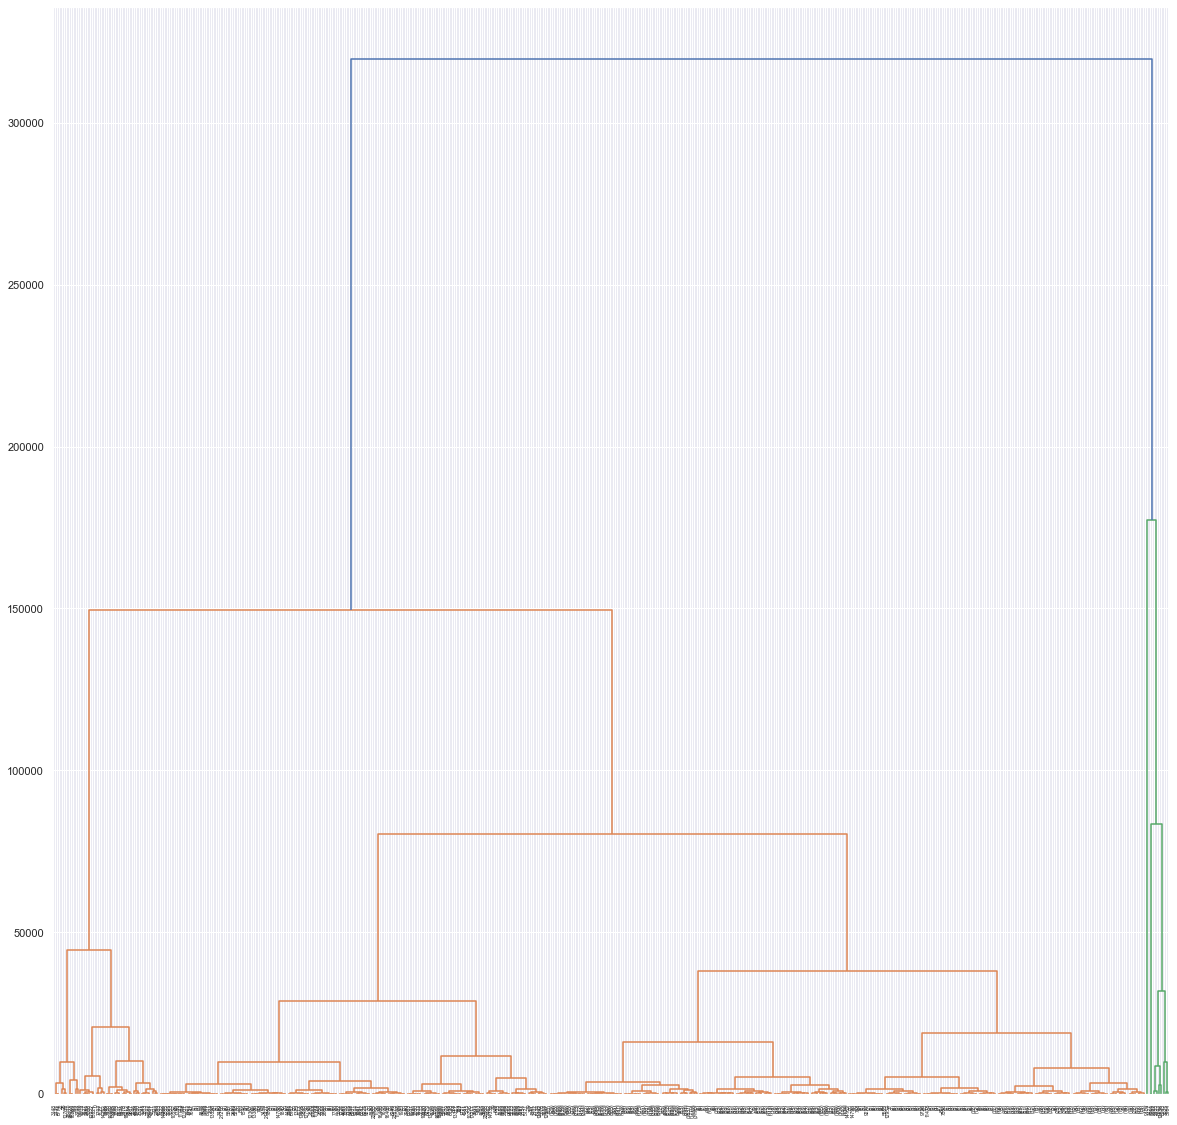

In [33]:
HAC_model.labels_
plt.figure(figsize=(20,20))
plot_dendrogram(HAC_model, truncate_mode='level', p=10)
plt.show()

In [34]:
HAC_model = AgglomerativeClustering(n_clusters=13,affinity="euclidean", linkage="ward")
HAC_model = HAC_model.fit(data[features])
data["hac"] = HAC_model.labels_

In [35]:
get_recommendations("Gang Beasts", 5)

Distance of neighbors: [0.0, 2.9308706601009162, 4.254420910728253, 5.333344662068555, 8.72127285164392, 9.424849465227073, 12.10611537210379, 13.96713664499637, 14.347202616711892, 14.385069791683442, 16.188748009944923]


,appid,name,average_playtime,owners,rating,Action,Adventure,Animation & Modeling,Casual,Design & Illustration,...,app_name,count,mean,positive_rate,weighted_score,kmeans_cluster,kmeans_cluster_unweighted,genres_cluster,genres_cluster_unweighted,hac
2788,285900,Gang Beasts,681,1000000-2000000,69.563642,1,1,0,1,0,...,Gang Beasts,6015.0,0.506899,0.753450,0.734991,0,0,17,7,7
329,13200,Unreal 2: The Awakening,682,200000-500000,70.588235,1,0,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,15,14,7
2302,264540,Platformines,679,100000-200000,66.549296,1,0,0,0,0,...,Platformines,171.0,0.298246,0.649123,0.617458,0,0,6,6,7
14018,616560,Ultimate Epic Battle Simulator,677,200000-500000,67.587698,1,1,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,9,13,7
4073,329430,State of Decay: YOSE,676,200000-500000,76.084408,1,0,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,15,14,7
18428,750920,Shadow of the Tomb Raider,672,500000-1000000,71.076115,1,1,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,8,21,7
3227,300760,Epsilon,679,0-20000,57.943925,1,0,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,4,4,7
14665,641990,The Escapists 2,674,500000-1000000,81.333973,0,0,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,12,12,7
1478,219640,Chivalry: Medieval Warfare,675,5000000-10000000,82.480220,1,0,0,0,0,...,Chivalry: Medieval Warfare,21288.0,0.631436,0.815718,0.800000,0,0,6,6,7
1519,222480,Resident Evil Revelations / Biohazard Revelations,683,500000-1000000,83.577564,1,1,0,0,0,...,0,0.0,0.000000,0.000000,0.000000,0,0,8,21,7


In [36]:
data.to_csv("Datasets/data_clustered.csv", index=False)